<a href="https://colab.research.google.com/github/daviddangtim/Crop_Disease_Detection/blob/main/crop_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow  matplotlib kagglehub

In [2]:
import kagglehub
path = kagglehub.dataset_download("sivm205/soybean-diseased-leaf-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sivm205/soybean-diseased-leaf-dataset/versions/1


In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt

In [29]:
IMAGE_SIZE = 360
BATCH_SIZE =32
CHANNELS=3
EPOCHS=50

In [30]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 701 files belonging to 10 classes.


In [31]:
class_names = dataset.class_names

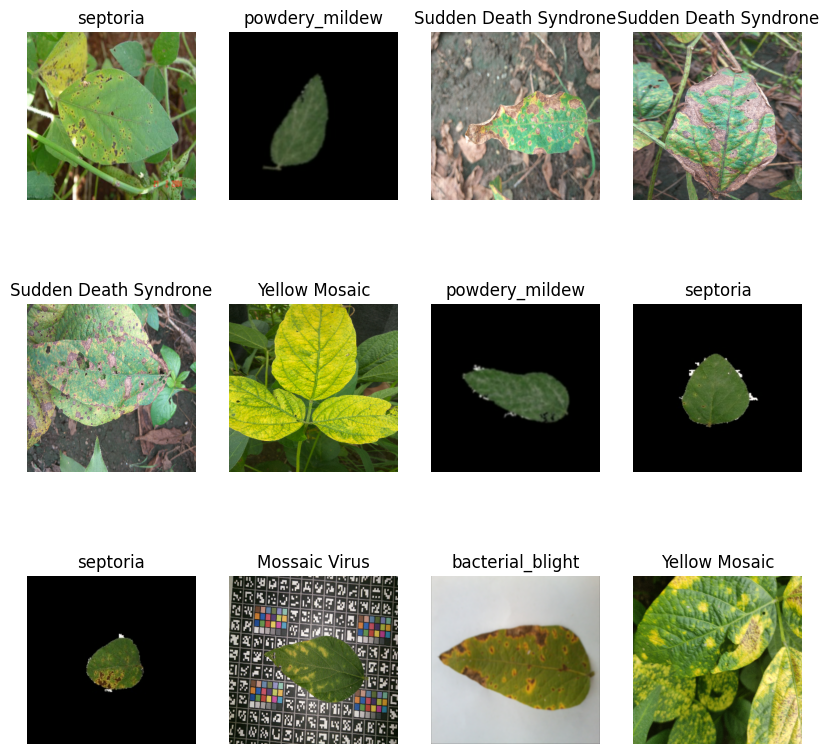

In [32]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [33]:
def get_dataset_partition_tf(ds, train_split=0.8,validation_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)

  val_size = int(validation_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds= ds.skip(train_size).take(val_size)

  test_ds = ds.skip(train_size).skip(val_size)


  return train_ds, val_ds, test_ds

In [34]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

Next is caching and prefetching




In [35]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Next we do some preprocessing

In [36]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

Data Augmentation

In [37]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])